In [117]:
import re 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 5
import seaborn as sns; sns.set()
from scipy.stats import ttest_ind

# Movielens Dataset

## Reading the data

In [87]:
movies = pd.read_csv("movies.csv")

In [88]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
ratings = pd.read_csv("ratings.csv")

In [90]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Exploratory Data Analysis 

In [91]:
## How many movie releases by year 

In [92]:
# this function will extract the year from the movie name 
def extract_year(x):
    x = x.strip().split(" ")[-1]
    return re.sub(r'[^0-9]+','',x)

In [ ]:
#Extracting the year from the title 
movies['year'] = movies.title.apply(extract_year)
movies['len_year'] = movies.year.apply(lambda x : len(x))

In [ ]:
#Taking only the movies which has the year. Since all our years are in the 4 digits I have used length 4 here 
year_agg = movies[movies.len_year==4].groupby("year",as_index=False)['movieId'].count()

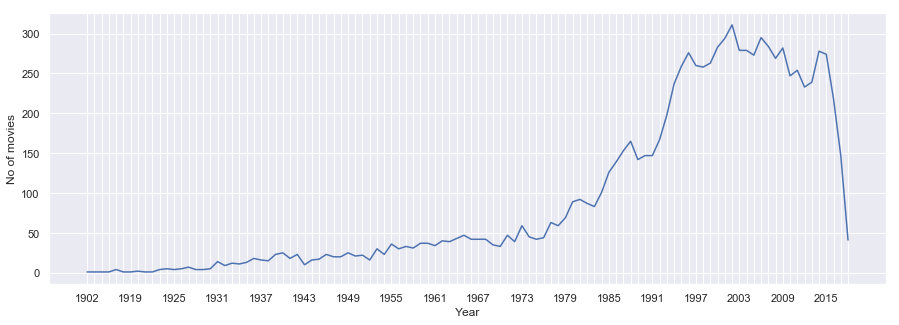

In [127]:
# Plotting the Number of movies released by years 
fig, ax = plt.subplots()
sns.lineplot(year_agg['year'], year_agg['movieId'])
every_nth = 6
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.ylabel("No of movies")
plt.xlabel("Year")
plt.show() 

Movie releases increased across the years and in the recent years it has been the highest. The dip at the end might be caused because of lack of data collected.

# Finding movies by the genres they identifed with itself 

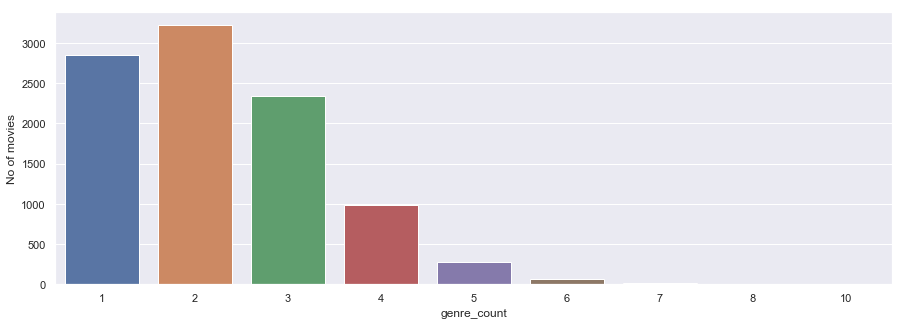

In [94]:
movies['genre_count']  = movies['genres'].apply(lambda x : len(x.split("|")))
genre_count = movies.groupby('genre_count',as_index=False)['movieId'].count() 
sns.barplot(genre_count.genre_count,genre_count.movieId)
plt.ylabel("No of movies")
plt.show() 

From the graph we can see that movies are mostly identified with upto 3 genres 

In [95]:
### Ratings Data Analysis 

In [96]:
ratings.drop('timestamp',inplace=True,axis=1)
#Merging the movies with user ratings to get the idea of how movies performed with the user
movies_w_rating = pd.merge(movies,ratings,on='movieId')

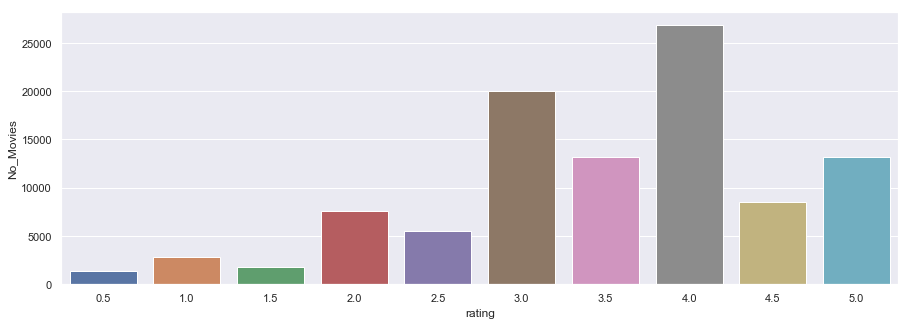

In [97]:
ratings_agg = movies_w_rating.groupby("rating",as_index=False)['movieId'].count() #using groupby function to calculate count
ratings_agg.columns = ['rating','No_Movies']
sns.barplot(ratings_agg.rating,ratings_agg.No_Movies) #barplot 

From the graph we can see that users have been pretty generous with the ratings. Majority of users rated their movies 3 or above 

## How does average rating differ over the years? Has the users always been generous?

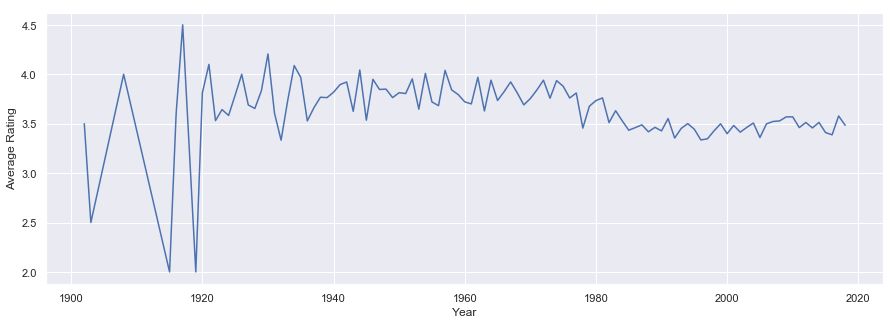

In [122]:
ratings_avg = movies_w_rating[movies_w_rating.len_year==4].groupby("year",as_index=False)['rating'].mean() 
ratings_avg.columns = ['year','avg_rating']
# Plotting the Number of movies released by years 
plt.plot(ratings_avg['year'],ratings_avg['avg_rating'])
plt.ylabel("Average Rating")
plt.xlabel("Year")
plt.show() 

Barring the initial variance the average moving ratings looks almost the same in the last 20 years 

# Hypothesis Testing

From the graph we discussed above i would like to test the following hypothesis 

#### Null Hypothesis: Movies released in current decade (2009-2018) and  Movies released  in the previous decade (1999-2008)  have same average ratings
#### Alternate Hypothesis : Movies released in the different time frame have different average ratings 


In [100]:
# Filtering the data for current 10 years and previous 10 years 
movies_w_rating = movies_w_rating[movies_w_rating.len_year==4]
movies_w_rating.year = movies_w_rating.year.astype(int)
cur_10_years = movies_w_rating[(movies_w_rating.year>=2009) & (movies_w_rating.year<=2018)]
prev_10_years = movies_w_rating[(movies_w_rating.year>=1999) & (movies_w_rating.year<=2008)]

In [101]:
print("Average rating of movies in the currrent 10 years:",np.mean(cur_10_years.rating))

Average rating of movies in the currrent 10 years: 3.5018954421228954


In [102]:
print("Average rating of movies in the past 10 years:",np.mean(prev_10_years.rating))

Average rating of movies in the past 10 years: 3.464448622326327


From the above analysis we can see the average ratings in the two time frames are different by a verysmall margin. But we need to prove that our finding is statistically significant before we can accept/reject the null hypothesis 

In [119]:
ttest,pval = ttest_ind(cur_10_years['rating'], prev_10_years['rating']) # Performing T-Test

In [125]:
print("p-value is : ",pval)

p-value is :  0.0008885399830495115


# The p-value is lesser than the siginficant value of 0.05 
#  We reject the null hypothesis that the movies released from two different decades have the same average ratings 